#**Machine Learning for Credit Risk Analysis**

**Home Credit x Rakamin Academy VIX Data Scientist**

By Giselle Halim

### Import Library

In [264]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import gdown
import os

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [265]:
gdown.download_folder("https://drive.google.com/drive/folders/1pk8rLp_V7j1mbGpWit_3dEPzVzLuQT39?usp=sharing")

Retrieving folder list


Processing file 1PYq-REyiKcs2NJ52AjqBsI-LNmM4iFLV application_test.csv
Processing file 1-DjGKel786HMQV5LCmE78lvZ8uDTyu6Z application_train.csv
Processing file 1BrC8-VdFYUCX7D64g-V8HrCSix_Znykv bureau_balance.csv
Processing file 1V4oqTI6fpCl_qjDcs-gGgj7oR937654j bureau.csv
Processing file 1zodn86j_f3uAJQpcGsWinqMZq9Hfd8aO credit_card_balance.csv
Processing file 1PtkDvkLpHEO1tzGNjC8P4nKvIvV4T5Nn HomeCredit_columns_description.csv
Processing file 1rgqoB8hlbO5eeQuKKoalcCWhK3ZT7gK5 installments_payments.csv
Processing file 1mLLnomR6DJfJH7LNc80O04pEvulsm80x POS_CASH_balance.csv
Processing file 12z0x4Ya0od7SC97bPRT83Z3VPFvAU1By previous_application.csv
Processing file 1A90AEDAKs7XPMp8FVGj_0GqoSaMMZNHw sample_submission.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1PYq-REyiKcs2NJ52AjqBsI-LNmM4iFLV
To: /content/Final_Task/application_test.csv
100%|██████████| 26.6M/26.6M [00:00<00:00, 215MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-DjGKel786HMQV5LCmE78lvZ8uDTyu6Z
To: /content/Final_Task/application_train.csv
100%|██████████| 166M/166M [00:00<00:00, 180MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BrC8-VdFYUCX7D64g-V8HrCSix_Znykv
To: /content/Final_Task/bureau_balance.csv
100%|██████████| 376M/376M [00:05<00:00, 67.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1V4oqTI6fpCl_qjDcs-gGgj7oR937654j
To: /content/Final_Task/bureau.csv
100%|██████████| 170M/170M [00:03<00:00, 54.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zodn86j_f3uAJQpcGsWinqMZq9Hfd8aO
To: /content/Final_Task/credit_card_balance.csv
100%|██████████| 425M/425M [00:05<00:00, 83.7MB/s]
Downloading...
From: https://drive.g

['/content/Final_Task/application_test.csv',
 '/content/Final_Task/application_train.csv',
 '/content/Final_Task/bureau_balance.csv',
 '/content/Final_Task/bureau.csv',
 '/content/Final_Task/credit_card_balance.csv',
 '/content/Final_Task/HomeCredit_columns_description.csv',
 '/content/Final_Task/installments_payments.csv',
 '/content/Final_Task/POS_CASH_balance.csv',
 '/content/Final_Task/previous_application.csv',
 '/content/Final_Task/sample_submission.csv']

In [266]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [267]:
df = pd.read_csv('/content/Final_Task/application_train.csv')

#df_train = pd.read_csv('/content/Final_Task/application_train.csv')
#df_test = pd.read_csv('/content/Final_Task/application_test.csv')
#df = df_test.append(df_train, ignore_index=True)

df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Sneak Peak Data

In [268]:
#How many rows and columns in the dataset?
df.shape

(307511, 122)

In [269]:
#General information of the dataset
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### Handling Missing Values

In [270]:
#Checking for missing values
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [271]:
#Deleting all columns with null value above 90%
df = df.loc[:, df.isnull().mean() < .5]

In [272]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

## Data Preprocessing

###Convert Days into Age, Years_Employed, Years_Since_Registered, and Years_ID_Published

In [273]:
df['DAYS_BIRTH'] = np.abs(df['DAYS_BIRTH'])
df['DAYS_EMPLOYED'] = np.abs(df['DAYS_EMPLOYED'])
df['DAYS_REGISTRATION'] = np.abs(df['DAYS_REGISTRATION'])
df['DAYS_ID_PUBLISH'] = np.abs(df['DAYS_ID_PUBLISH'])
df['DAYS_LAST_PHONE_CHANGE'] = np.abs(df['DAYS_LAST_PHONE_CHANGE'])

In [274]:
df['AGE'] = np.round(df['DAYS_BIRTH']/365)
df['YEARS_EMPLOYED'] = np.round(df['DAYS_EMPLOYED']/365)
df['YEARS_REGISTERED'] = np.round(df['DAYS_REGISTRATION']/365)
df['YEARS_ID_PUBLISHED'] = np.round(df['DAYS_ID_PUBLISH']/365)
df['YEARS_PHONE_CHANGED'] = np.round(df['DAYS_LAST_PHONE_CHANGE']/365)

In [275]:
#Deleting unused columns
dropped = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

df.drop(columns = dropped, axis=1, inplace=True)

In [276]:
df['YEARS_EMPLOYED'].value_counts()

1001.0    55374
1.0       34796
2.0       30530
3.0       27721
4.0       22933
5.0       19191
6.0       15372
7.0       14080
8.0       12381
9.0        9971
0.0        9752
10.0       8299
11.0       6483
12.0       5621
13.0       4770
14.0       4500
15.0       3916
16.0       2352
17.0       2232
18.0       1914
19.0       1851
20.0       1798
21.0       1510
22.0       1401
23.0       1100
24.0        950
25.0        862
26.0        727
28.0        656
27.0        638
29.0        567
30.0        512
31.0        439
32.0        390
34.0        355
33.0        352
35.0        300
36.0        207
37.0        174
38.0        128
39.0        122
40.0         82
41.0         66
42.0         44
43.0         31
45.0         27
44.0         20
46.0          7
48.0          4
47.0          2
49.0          1
Name: YEARS_EMPLOYED, dtype: int64

In [277]:
#10 years or more is written as 10
df["YEARS_EMPLOYED"] = np.where(df["YEARS_EMPLOYED"] >= 10.0, 10.0, df["YEARS_EMPLOYED"])

In [278]:
df['YEARS_REGISTERED'].value_counts()

1.0     15661
2.0     15564
3.0     13894
13.0    12866
12.0    12697
4.0     12002
11.0    11870
8.0     11615
14.0    11501
7.0     11478
9.0     10806
5.0     10686
10.0    10300
6.0     10272
15.0     9166
0.0      9007
17.0     8813
16.0     8397
18.0     8107
19.0     8059
20.0     7936
22.0     7606
21.0     7345
23.0     7185
24.0     7099
25.0     6655
26.0     6088
27.0     5575
28.0     4757
29.0     3809
30.0     3169
31.0     2724
32.0     2406
33.0     2225
34.0     2048
35.0     1814
36.0     1510
37.0     1238
38.0      905
39.0      675
40.0      506
41.0      394
42.0      294
43.0      233
44.0      162
45.0      112
46.0       66
47.0       61
48.0       32
49.0       30
50.0       22
51.0       12
53.0       12
52.0        8
57.0        7
56.0        7
54.0        6
55.0        3
61.0        3
58.0        3
60.0        2
63.0        2
62.0        1
65.0        1
68.0        1
64.0        1
Name: YEARS_REGISTERED, dtype: int64

In [279]:
#15 years or more is written as 15
df["YEARS_REGISTERED"] = np.where(df["YEARS_REGISTERED"] >= 15.0, 15.0, df["YEARS_REGISTERED"])

In [280]:
df['YEARS_ID_PUBLISHED'].value_counts()

12.0    42521
11.0    36130
13.0    30414
7.0     19394
9.0     19089
8.0     18668
6.0     17513
3.0     17413
5.0     17097
10.0    16955
2.0     16546
4.0     16488
1.0     15131
14.0    11656
0.0      7861
15.0     3046
16.0     1233
17.0      354
20.0        1
18.0        1
Name: YEARS_ID_PUBLISHED, dtype: int64

In [281]:
#15 years or more is written as 15
df["YEARS_ID_PUBLISHED"] = np.where(df["YEARS_ID_PUBLISHED"] >= 15.0, 15.0, df["YEARS_ID_PUBLISHED"])

In [282]:
df['YEARS_PHONE_CHANGED'].value_counts()

0.0     64176
1.0     58998
2.0     48141
4.0     34677
3.0     32321
5.0     31080
6.0     16620
7.0     12631
8.0      5300
9.0      2986
10.0      509
11.0       70
12.0        1
Name: YEARS_PHONE_CHANGED, dtype: int64

In [283]:
#10 years or more is written as 10
df["YEARS_PHONE_CHANGED"] = np.where(df["YEARS_PHONE_CHANGED"] >= 10.0, 10.0, df["YEARS_PHONE_CHANGED"])

In [284]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTERED,YEARS_ID_PUBLISHED,YEARS_PHONE_CHANGED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0,6.0,3.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,12.0,7.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0,15.0,7.0,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,12.0,9.0,3.0


###Categorical Data

In [285]:
#Looking at values in other columns
cat = df.select_dtypes (include= ['object'])

for col in cat.columns.tolist():
    print(df[col].value_counts()[:20])
    print('\n')

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Nam

In [286]:
#Dominated by a single value
#df.drop('EMERGENCYSTATE_MODE', axis=1, inplace=True)

In [287]:
#Count the number of '1' values in FLAG_DOCUMENT columns
count = df[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']].sum(axis=1)

#Create a new column based on the count
df['DOCUMENTS_FLAGGED'] = count

In [288]:
#Drop unused columns
flag = df[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']]

df.drop(columns = flag, axis=1, inplace=True)

In [289]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTERED,YEARS_ID_PUBLISHED,YEARS_PHONE_CHANGED,DOCUMENTS_FLAGGED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0,6.0,3.0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0,2.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,12.0,7.0,2.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0,15.0,7.0,2.0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,12.0,9.0,3.0,1


## Exploratory Data Analysis

In [290]:
#Describing the dataset
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTERED,YEARS_ID_PUBLISHED,YEARS_PHONE_CHANGED,DOCUMENTS_FLAGGED
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.938646,6.029459,10.229380,8.192237,2.632636,0.930155
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.964047,3.604583,5.226138,4.140065,2.280535,0.344295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.166700,0.976700,0.166700,0.041200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,3.000000,6.000000,5.000000,1.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.981600,0.166700,0.981600,0.166700,0.981600,0.166700,0.068800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,6.000000,12.000000,9.000000,2.000000,1

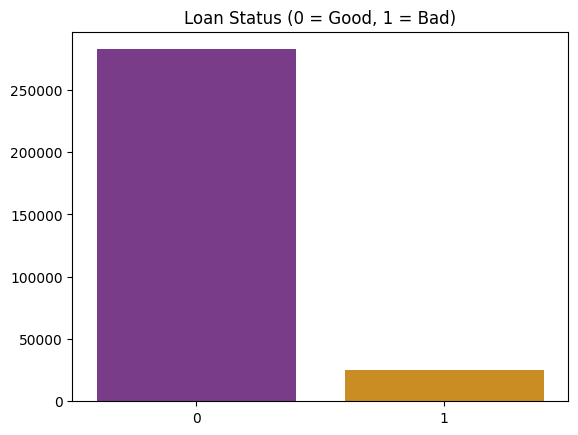

In [291]:
data_plot  = df['TARGET'].value_counts().to_list()
label_plot = df['TARGET'].value_counts().index.to_list()

title = 'Loan Status (0 = Good, 1 = Bad)'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [292]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

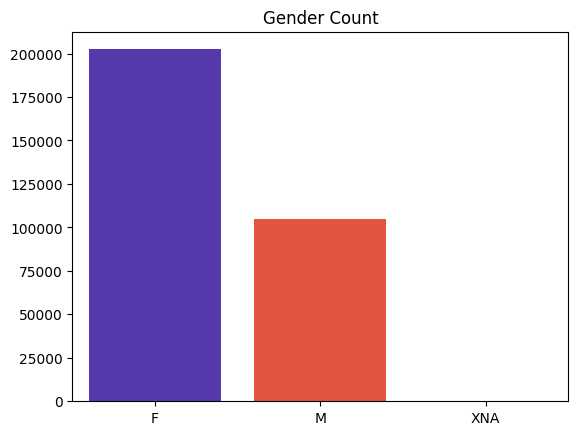

In [293]:
data_plot  = df['CODE_GENDER'].value_counts().to_list()
label_plot = df['CODE_GENDER'].value_counts().index.to_list()

title = 'Gender Count'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

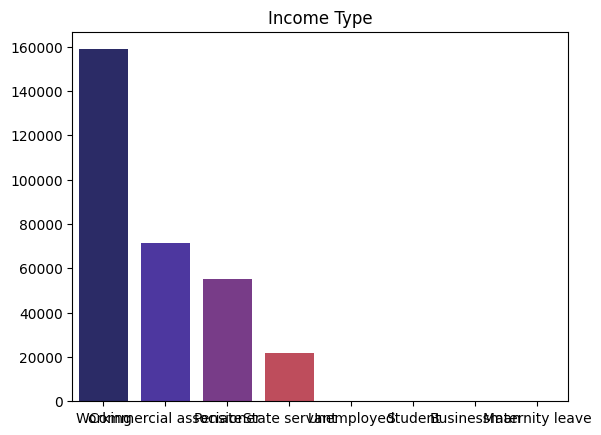

In [294]:
data_plot  = df['NAME_INCOME_TYPE'].value_counts().to_list()
label_plot = df['NAME_INCOME_TYPE'].value_counts().index.to_list()

title = 'Income Type'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

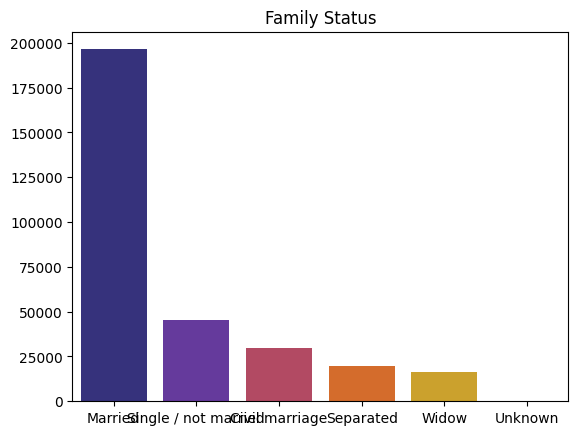

In [295]:
data_plot  = df['NAME_FAMILY_STATUS'].value_counts().to_list()
label_plot = df['NAME_FAMILY_STATUS'].value_counts().index.to_list()

title = 'Family Status'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

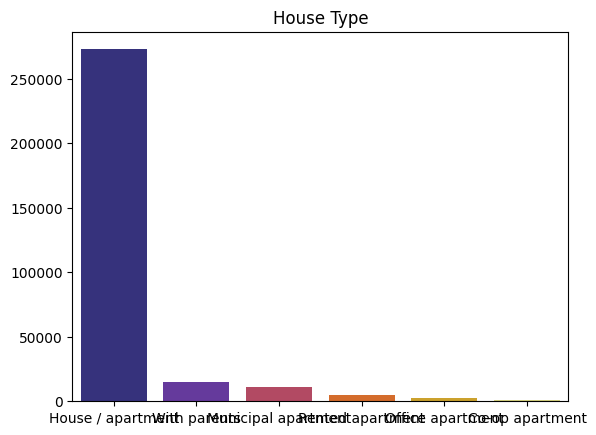

In [296]:
data_plot  = df['NAME_HOUSING_TYPE'].value_counts().to_list()
label_plot = df['NAME_HOUSING_TYPE'].value_counts().index.to_list()

title = 'House Type'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

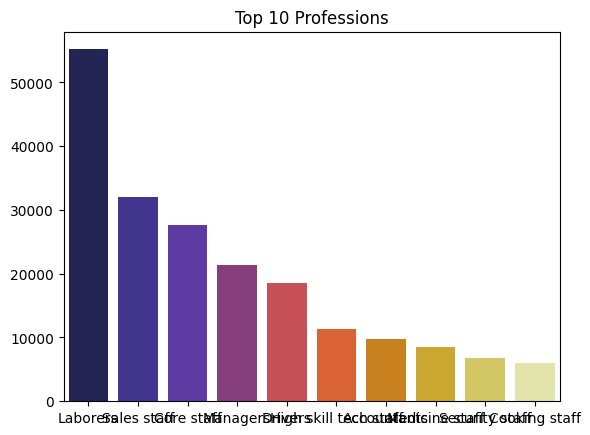

In [297]:
data_plot  = df['OCCUPATION_TYPE'].value_counts()[:10].to_list()
label_plot = df['OCCUPATION_TYPE'].value_counts()[:10].index.to_list()

title = 'Top 10 Professions'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)
plt.show()

In [298]:
df['OCCUPATION_TYPE'].value_counts()[:10]

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Name: OCCUPATION_TYPE, dtype: int64

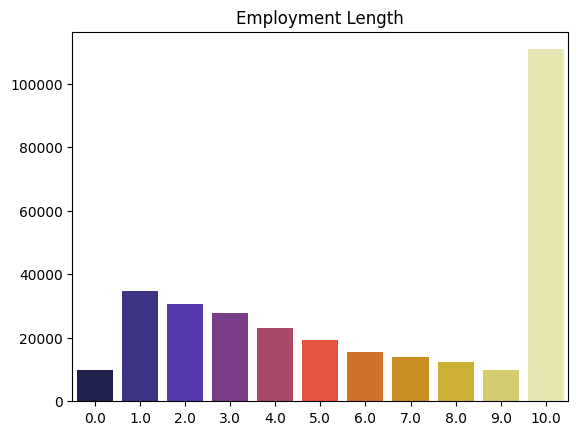

In [299]:
data_plot  = df['YEARS_EMPLOYED'].value_counts().to_list()
label_plot = df['YEARS_EMPLOYED'].value_counts().index.to_list()

title = 'Employment Length'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [300]:
df['YEARS_EMPLOYED'].value_counts()

10.0    110784
1.0      34796
2.0      30530
3.0      27721
4.0      22933
5.0      19191
6.0      15372
7.0      14080
8.0      12381
9.0       9971
0.0       9752
Name: YEARS_EMPLOYED, dtype: int64

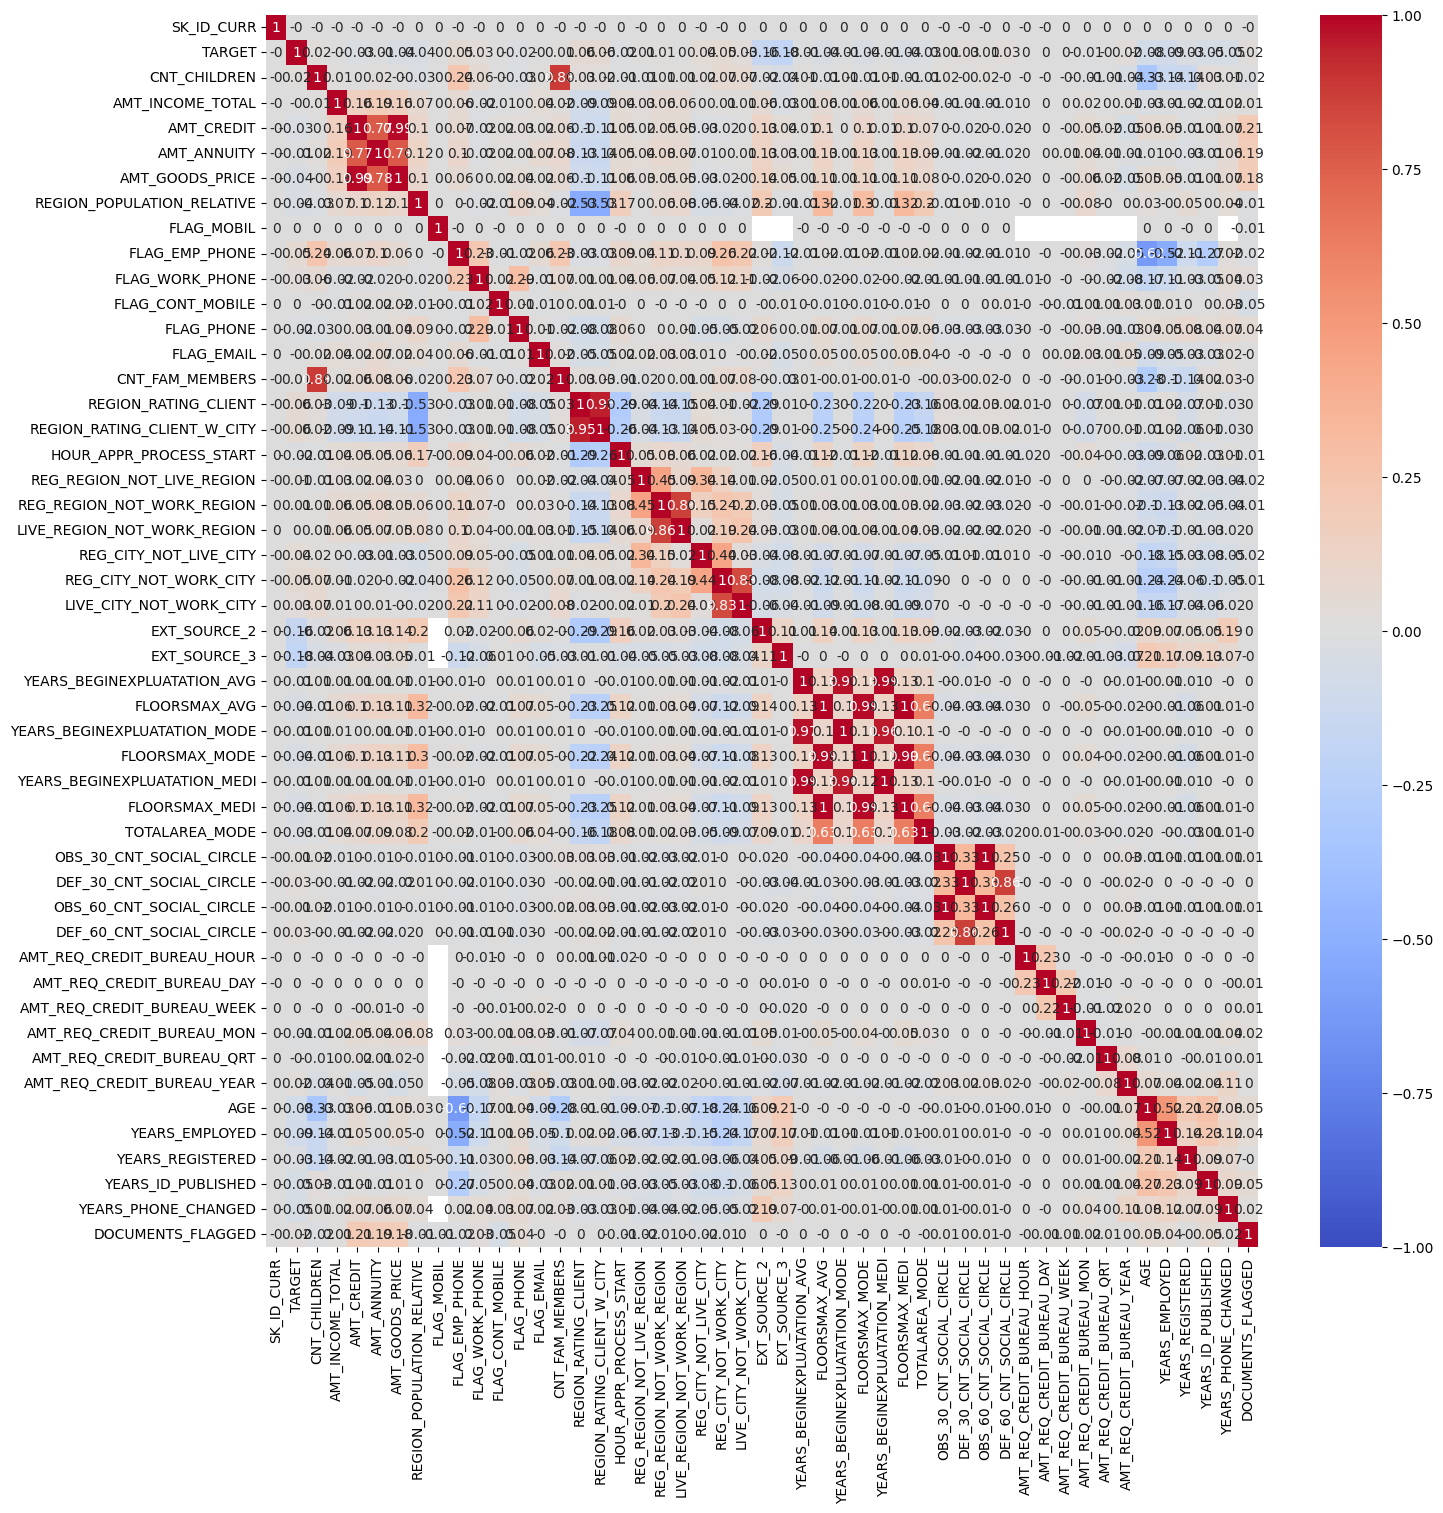

In [301]:
#Correlations between features
matrix = df.corr().round(2)
plt.figure(figsize=(16,16))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
title = 'Feature Correlations'
plt.show()

In [302]:
#Risk percentage of bad credit
def risk_percentage(x):
    ratio = (df.groupby(x)['TARGET']
         .value_counts(normalize=True)
         .mul(100)
         .rename('risk (%)')
         .reset_index())

    sns.lineplot(data=ratio[ratio['TARGET'] == 1], x=x, y='risk (%)')
    plt.title(x)
    plt.show()

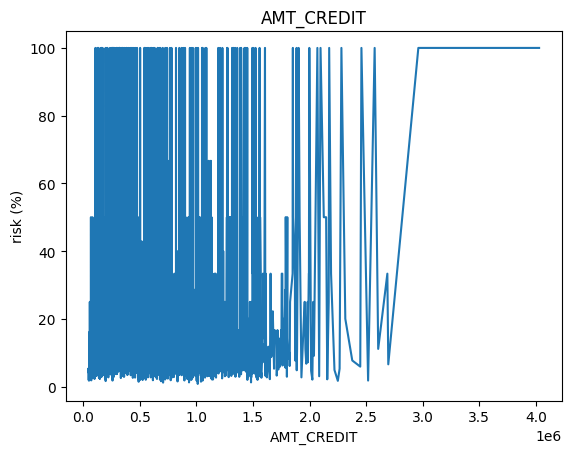

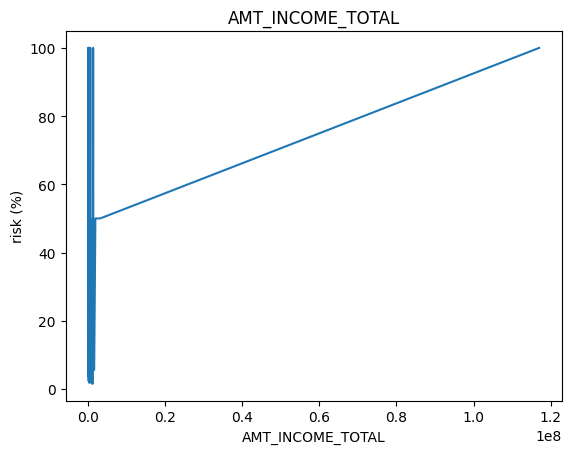

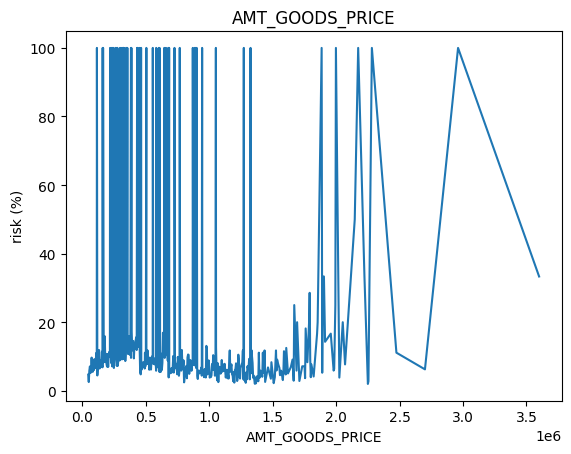

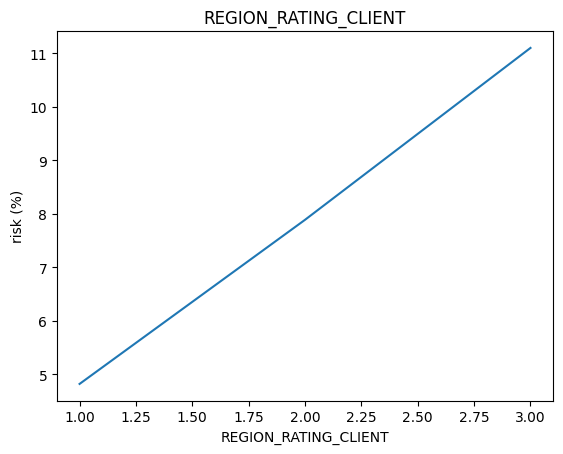

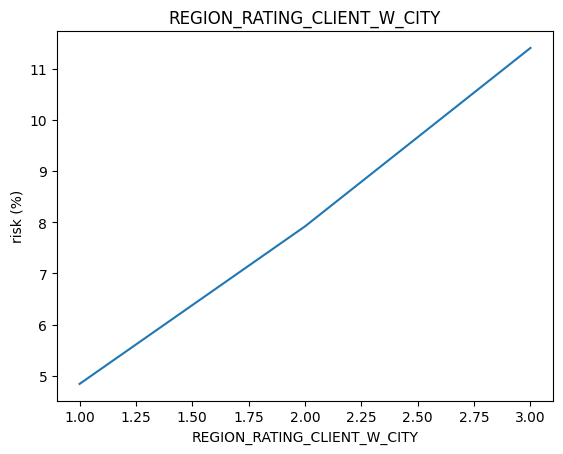

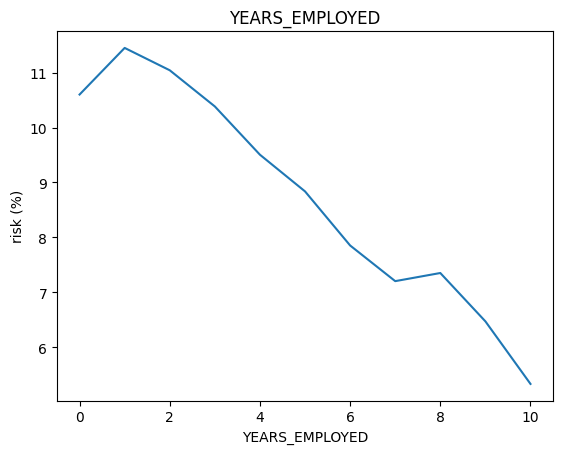

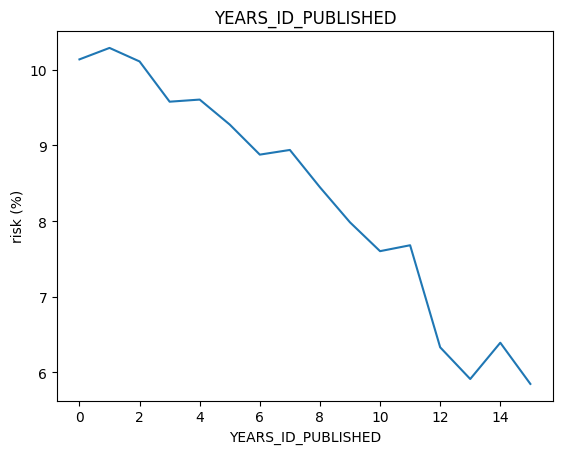

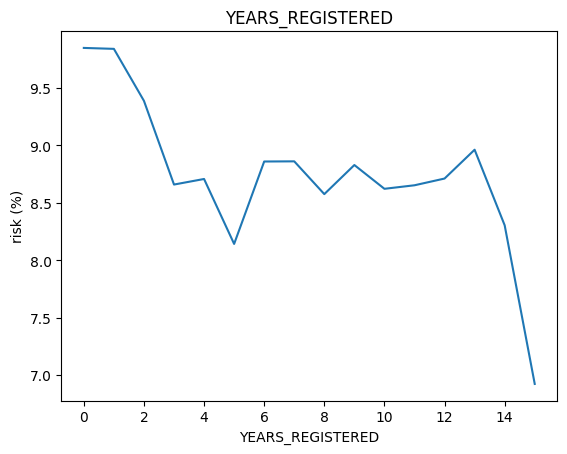

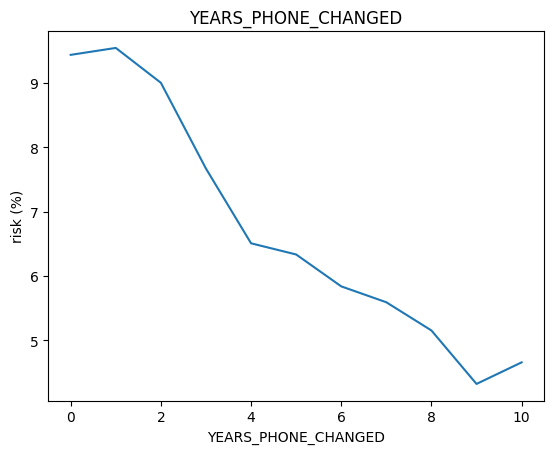

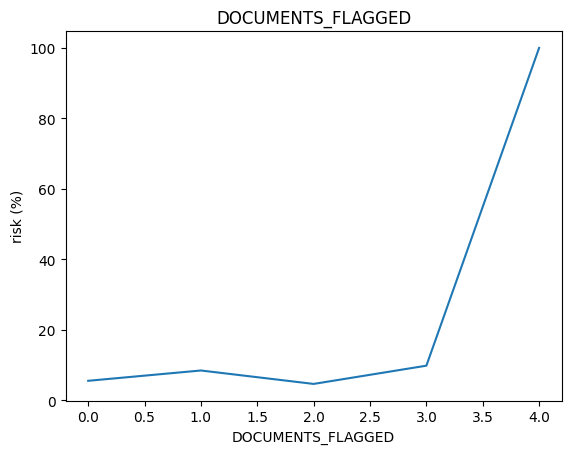

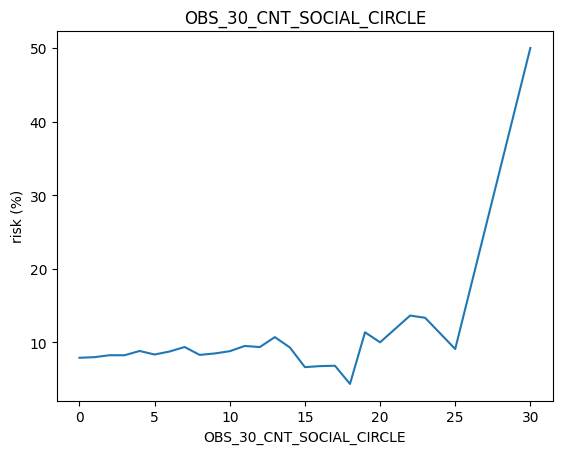

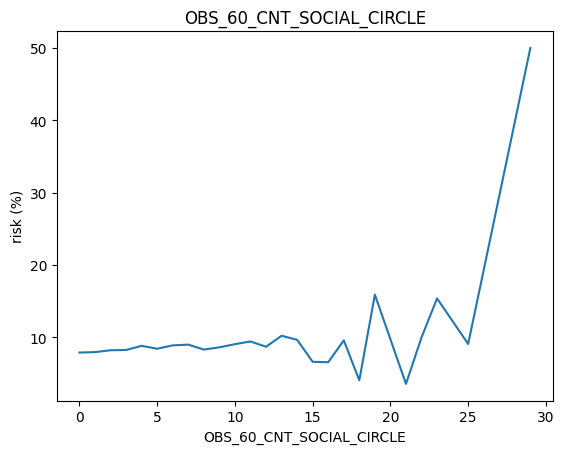

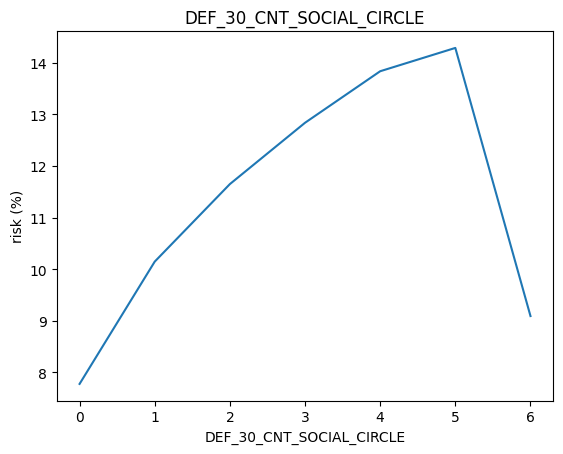

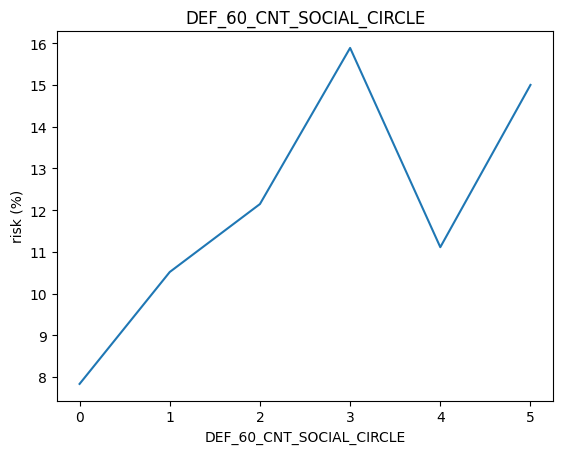

In [303]:
columns = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'YEARS_EMPLOYED','YEARS_ID_PUBLISHED', 'YEARS_REGISTERED', 'YEARS_PHONE_CHANGED', 'DOCUMENTS_FLAGGED', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
for cols in columns:
    risk_percentage(cols)

In [304]:
df.groupby(by = 'TARGET').mean()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTERED,YEARS_ID_PUBLISHED,YEARS_PHONE_CHANGED,DOCUMENTS_FLAGGED
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,278244.744536,0.412946,169077.722266,602648.282002,27163.623349,542736.795003,0.021021,0.999996,0.814653,0.195991,0.998129,0.284238,0.056840,2.150154,2.043578,2.022449,12.086807,0.014942,0.050317,0.040494,0.074641,0.22409,0.175856,0.523479,0.520969,0.977893,0.228023,0.977225,0.224015,0.977916,0.227634,0.103507,1.415742,0.139148,1.398923,0.096688,0.006380,0.006914,0.034315,0.270697,0.265939,1.889199,44.216123,6.123770,10.279688,8.255244,2.669371,0.928401
1,277449.167936,0.463807,165611.760906,557778.527674,26481.744290,488972.412554,0.019131,1.000000,0.879517,0.237825,0.998187,0.244955,0.055347,2.181269,2.153635,2.134824,11.797100,0.017442,0.055911,0.042538,0.118389,0.30292,0.221672,0.410935,0.390717,0.975634,0.203021,0.974938,0.199612,0.975570,0.202692,0.089769,1.496147,0.191980,1.477672,0.138247,0.006672,0.008036,0.034919,0.227926,0.259923,2.028783,40.778973,4.955529,9.656516,7.474763,2.214340,0.950131


In [305]:
pd.crosstab(index=df['TARGET'], columns=df['NAME_CONTRACT_TYPE'])

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
TARGET,,
0,255011,27675
1,23221,1604


In [306]:
pd.crosstab(index=df['TARGET'], columns=df['NAME_TYPE_SUITE'])

NAME_TYPE_SUITE,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied
TARGET,,,,,,,
0,3026,37140,248,790,1596,10475,228189
1,241,3009,23,76,174,895,20337


In [307]:
pd.crosstab(index=df['TARGET'], columns=df['NAME_INCOME_TYPE'])

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
TARGET,,,,,,,,
0,10,66257,3,52380,20454,18,14,143550
1,0,5360,2,2982,1249,0,8,15224


In [308]:
pd.crosstab(index=df['TARGET'], columns=df['NAME_FAMILY_STATUS'])

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
TARGET,,,,,,
0,26814,181582,18150,40987,2,15151
1,2961,14850,1620,4457,0,937


In [309]:
pd.crosstab(index=df['TARGET'], columns=df['NAME_HOUSING_TYPE'])

NAME_HOUSING_TYPE,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
TARGET,,,,,,
0,1033,251596,10228,2445,4280,13104
1,89,21272,955,172,601,1736


In [310]:
pd.crosstab(index=df['TARGET'], columns=df['OCCUPATION_TYPE'])

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
TARGET,,,,,,,,,,,,,,,,,,
0,9339,4206,5325,25832,16496,527,10679,492,49348,1734,20043,7965,2477,692,29010,1213,5999,1196
1,474,447,621,1738,2107,36,701,34,5838,359,1328,572,175,59,3092,92,722,152


In [311]:
pd.crosstab(index=df['TARGET'], columns=df['REGION_RATING_CLIENT'])

REGION_RATING_CLIENT,1,2,3
TARGET,,,
0,30645,209077,42964
1,1552,17907,5366


In [312]:
pd.crosstab(index=df['TARGET'], columns=df['REGION_RATING_CLIENT_W_CITY'])

REGION_RATING_CLIENT_W_CITY,1,2,3
TARGET,,,
0,32513,211314,38859
1,1654,18170,5001


In [313]:
pd.crosstab(index=df['TARGET'], columns=df['FLAG_MOBIL'])

FLAG_MOBIL,0,1
TARGET,,
0,1,282685
1,0,24825


In [314]:
pd.crosstab(index=df['TARGET'], columns=df['DOCUMENTS_FLAGGED'])

DOCUMENTS_FLAGGED,0,1,2,3,4
TARGET,,,,,
0,27917,247239,7383,147,0
1,1632,22817,359,16,1


In [315]:
pd.pivot_table(df, values='AMT_CREDIT', index='TARGET', columns='REGION_RATING_CLIENT', aggfunc=np.mean)

REGION_RATING_CLIENT,1,2,3
TARGET,,,
0,763876.060793,584285.600415,577007.957476
1,683270.457796,550383.052270,546162.296310


In [316]:
pd.pivot_table(df, values='AMT_CREDIT', index='TARGET', columns='REGION_RATING_CLIENT_W_CITY', aggfunc=np.mean)

REGION_RATING_CLIENT_W_CITY,1,2,3
TARGET,,,
0,761850.116815,584321.875508,569103.852312
1,685642.135429,551388.209191,538707.477804


In [317]:
pd.pivot_table(df, values='AMT_CREDIT', index='TARGET', columns='OCCUPATION_TYPE', aggfunc=np.mean)

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
TARGET,,,,,,,,,,,,,,,,,,
0,712090.022004,514652.036020,543520.113803,628181.562577,618680.601358,686600.632827,645990.890533,649925.560976,575075.338636,463469.683391,779793.269196,611680.318079,632254.708922,659778.574422,565606.116236,594313.983512,561534.329555,493256.671405
1,663798.370253,476230.057047,501909.623188,581251.756329,562645.289986,661307.000000,596004.297432,613913.691176,532940.543679,434290.688022,704124.565889,548255.556818,608156.280000,602461.677966,541232.432406,583057.369565,520072.310942,477251.792763


In [318]:
pd.pivot_table(df, values='AMT_INCOME_TOTAL', index='TARGET', columns='OCCUPATION_TYPE', aggfunc=np.mean)

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
TARGET,,,,,,,,,,,,,,,,,,
0,195530.035818,131073.825963,138864.608003,173485.958488,187871.247702,188940.449715,183591.096392,216281.314024,164758.098132,133516.074394,260714.520155,150406.041808,182326.452765,195906.069364,152731.124473,161240.075021,150376.842057,144432.895485
1,175827.892405,128128.691275,134382.608696,160331.305236,180281.353583,188562.500000,171431.043509,172720.588235,179876.910586,131836.587744,254634.109563,140012.417832,182453.142857,184423.728814,148284.916882,151333.239130,143728.952909,143011.184211


In [319]:
def frequency(ds, vars):
    if len(vars) > 1:
        c1 = ds[vars[0]]
        c2 = []
        for i in range(1,len(vars)):
            c2.append(ds[vars[i]])
        dfs = []
        dfs.append(pd.crosstab(c1,c2).unstack().reset_index().rename(columns={0:'Count'}))
        dfs.append(pd.crosstab(c1,c2, normalize='all').unstack().reset_index().rename(columns={0:'Percent'}))
        dfs = [df.set_index(vars) for df in dfs]
        df = dfs[0].join(dfs[1:]).reset_index()
        return df

In [320]:
frequency(df,['FLAG_OWN_CAR','FLAG_OWN_REALTY']).sort_values(['Percent'], ascending=[False])

,FLAG_OWN_CAR,FLAG_OWN_REALTY,Count,Percent
2,N,Y,140952,0.458364
3,Y,Y,72360,0.235309
0,N,N,61972,0.201528
1,Y,N,32227,0.104800


In [321]:
frequency(df,['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE']).sort_values(['Percent'], ascending=[False])

,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,Count,Percent
39,Secondary / secondary special,Working,117630,0.382523
19,Secondary / secondary special,Pensioner,45101,0.146665
9,Secondary / secondary special,Commercial associate,43689,0.142073
36,Higher education,Working,33762,0.109791
6,Higher education,Commercial associate,24025,0.078127
24,Secondary / secondary special,State servant,11945,0.038844
21,Higher education,State servant,8863,0.028822
16,Higher education,Pensioner,8188,0.026627
37,Incomplete higher,Working,5585,0.018162
7,Incomplete higher,Commercial associate,3400,0.011057


In [322]:
frequency(df,['CODE_GENDER','NAME_FAMILY_STATUS']).sort_values(['Percent'], ascending=[False])

,CODE_GENDER,NAME_FAMILY_STATUS,Count,Percent
3,F,Married,122445,0.398181
4,M,Married,73984,0.240590
9,F,Single / not married,28584,0.092953
0,F,Civil marriage,20769,0.067539
10,M,Single / not married,16860,0.054827
6,F,Separated,15461,0.050278
15,F,Widow,15188,0.049390
1,M,Civil marriage,9005,0.029284
7,M,Separated,4309,0.014013
16,M,Widow,900,0.002927


In [323]:
frequency(df,['FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE']).sort_values(['Percent'], ascending=[False])

,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,Count,Percent
3,Y,House / apartment,199197,0.647772
2,N,House / apartment,73671,0.239572
10,N,With parents,9263,0.030122
4,N,Municipal apartment,6822,0.022185
11,Y,With parents,5577,0.018136
5,Y,Municipal apartment,4361,0.014182
8,N,Rented apartment,2795,0.009089
9,Y,Rented apartment,2086,0.006783
7,Y,Office apartment,1393,0.004530
6,N,Office apartment,1224,0.003980


##Missing Data Imputation

In [324]:
#Deleting unused columns
dropped = ['WEEKDAY_APPR_PROCESS_START', 'SK_ID_CURR', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OCCUPATION_TYPE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'EMERGENCYSTATE_MODE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

df.drop(columns = dropped, axis=1, inplace=True)

In [325]:
df.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION  

In [326]:
#Filling missing data
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean(), inplace=True)
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(), inplace=True)
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mean(), inplace=True)
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
df['YEARS_PHONE_CHANGED'].fillna(df['YEARS_PHONE_CHANGED'].mean(), inplace=True)

In [327]:
#Categorical data
cat = df.select_dtypes (include= ['object'])
cat

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Religion
...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Business Entity Type 1


In [328]:
#Labeling categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,x):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = x.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,x,y=None):
        return self.fit(x,y).transform(x)

df = MultiColumnLabelEncoder(columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',	'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE']).fit_transform(df)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  int64  
 2   CODE_GENDER                  307511 non-null  int64  
 3   FLAG_OWN_CAR                 307511 non-null  int64  
 4   FLAG_OWN_REALTY              307511 non-null  int64  
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  NAME_TYPE_SUITE              307511 non-null  int64  
 11  NAME_INCOME_TYPE             307511 non-null  int64  
 12  NAME_EDUCATION_TYPE          307511 non-null  int64  
 13 

In [330]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,YEARS_EMPLOYED,YEARS_REGISTERED,YEARS_ID_PUBLISHED,YEARS_PHONE_CHANGED,DOCUMENTS_FLAGGED
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,5,2.0,2.0,2.0,2.0,26.0,2.0,10.0,6.0,3.0,1
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,39,1.0,0.0,1.0,0.0,46.0,3.0,3.0,1.0,2.0,1
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,11,0.0,0.0,0.0,0.0,52.0,1.0,12.0,7.0,2.0,0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,5,2.0,0.0,2.0,0.0,52.0,8.0,15.0,7.0,2.0,1
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,37,0.0,0.0,0.0,0.0,55.0,8.0,12.0,9.0,3.0,1


## Training and Testing Data

In [331]:
#Defining x and y
x = df.drop(columns=['TARGET'], axis = 1)
y = df['TARGET']

In [332]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [333]:
x_train.shape, x_test.shape

((246008, 42), (61503, 42))

##Balancing data

The data is unbalanced, so we need to balance it first by oversampling the minority.

In [334]:
from imblearn.over_sampling import SMOTE

SMOTE = SMOTE()
x_train, y_train = SMOTE.fit_resample(x_train, y_train)

## Modelling

### Random Forest

In [335]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)

In [336]:
#Training the model
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [337]:
#Predict testing set
y_pred = rf.predict(x_test)

In [338]:
print('Training-set accuracy score:', rf.score(x_train, y_train))
print('Test-set accuracy score:', rf.score(x_test, y_test))

Training-set accuracy score: 0.8221238037960129
Test-set accuracy score: 0.7608084158496333


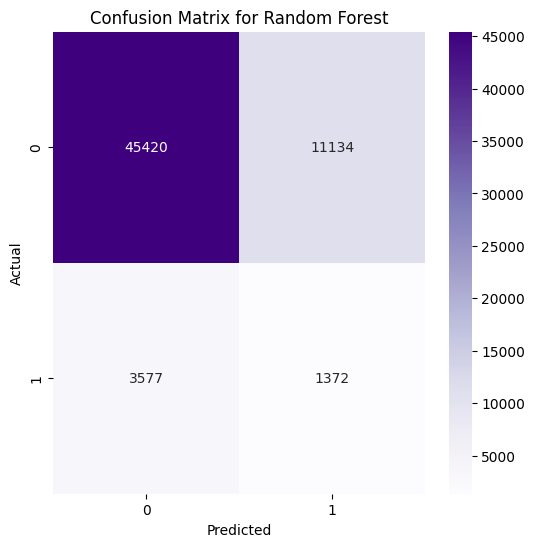

In [339]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [340]:
#Check model performance using classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     56554
           1       0.11      0.28      0.16      4949

    accuracy                           0.76     61503
   macro avg       0.52      0.54      0.51     61503
weighted avg       0.86      0.76      0.80     61503



In [341]:
#Check model performance using auc score
roc_auc_score(y_test, y_pred)*100

54.017696921228705